In [1]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

In [2]:
os.chdir('/content/drive/MyDrive/Tensorflow Advance/Advanced Computer Vision with TensorFlow/Week2')

In [2]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
Updating files:  25% (556/2173)
Updating files:  26% (565/2173)
Updating files:  27% (587/2173)
Updating files:  28% (609/2173)
Updating files:  29% (631/2173)
Updating files:  30% (652/2173)
Updating files:  31% (674/2173)
Updating files:  32% (696/2173)
Updating files:  33% (718/2173)
Updating files:  34% (739/2173)
Updating files:  35% (761/2173)
Updating files:  35% (773/2173)
Updating files:  36% (783/2173)
Updating files:  37% (805/2173)
Updating files:  38% (826/2173)
Updating files:  39% (848/2173)
Updating files:  40% (870/2173)
Updating files:  41% (891/2173)
Updating files:  42% (913/2173)
Updating files:  43% (935/2173)
Updating files:  44% (957/2173)
Updating files:  45% (978/2173)
Updating files:  46% (1000/2173)
Updating files:  47% (1022/2173)
Updating files:  48% (1044/2173)
Updating files:  49% (1065/2173)
Updating files:  50% (1087/2173)
Updating files:  51% (1109/2173)
Updating files:  52% (1130/2173)
Updating files:  53% (1152/2173)
Updatin

In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

In [23]:
def load_image_into_numpy_array(path):
    image = None
    if path.startswith('http'):
        response = urlopen(path)
        image_data = response.read()
        image_data = BytesIO(image_data)
        image = Image.open(image_data)
    else:
        image_data = tf.io.gfile.GFile(path, 'rb').read()
        image = Image.open(BytesIO(image_data))

        (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (1, im_height, im_width, 3)).astype(np.uint8)

In [4]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops
%matplotlib inline

In [5]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS)

In [32]:
url       = 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
print("Loading ...")
detector  = hub.load(url)
print("Done ...")

Loading ...
Done ...


In [12]:
img = load_image_into_numpy_array("https://s28258.pcdn.co/wp-content/uploads/2017/10/WhimsySoul-dublin-blog-20.jpg")

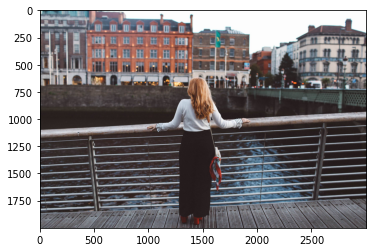

In [15]:
plt.imshow(img[0])

In [33]:
result = detector(img)

In [34]:
result = {key:value.numpy() for key,value in result.items()}
print(result.keys())

dict_keys(['class_predictions_with_background', 'raw_detection_boxes', 'proposal_boxes', 'rpn_box_encodings', 'box_classifier_features', 'raw_detection_scores', 'proposal_boxes_normalized', 'detection_multiclass_scores', 'num_proposals', 'anchors', 'detection_boxes', 'image_shape', 'rpn_objectness_predictions_with_background', 'detection_scores', 'detection_masks', 'rpn_features_to_crop', 'detection_anchor_indices', 'refined_box_encodings', 'mask_predictions', 'final_anchors', 'detection_classes', 'rpn_box_predictor_features', 'num_detections'])


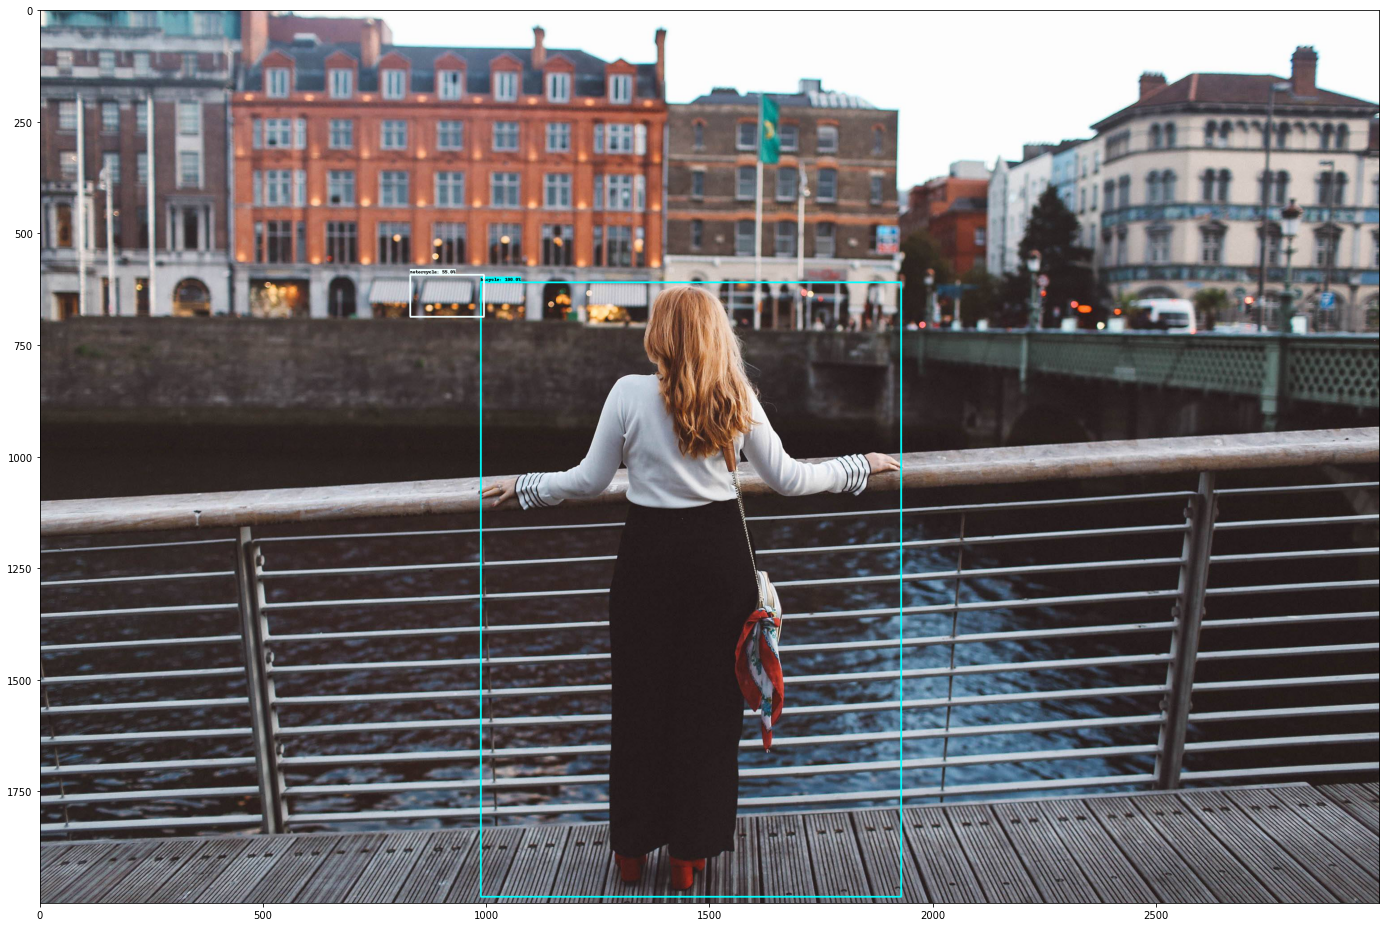

In [35]:
label_id_offset = 1
image_np_with_detections = img.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections[0],
    result['detection_boxes'][0],
    (result['detection_classes'][0] + label_id_offset).astype(int),
    result['detection_scores'][0],
    category_index,
    use_normalized_coordinates=True
)

plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections[0])
plt.show()